In [2]:
#IMDB Dataset Sentiment Analysis with NN

# -------------------- 1) IMPORT REQUIRED LIBRARIES --------------------

import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize 
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Deep Learning modules
#import numpy as np
np.random.seed(1337) # for reproducibility
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import Adadelta,Adam,RMSprop
from keras.utils import np_utils




# -------------------- 2) IMPORT AND ANALYZE THE PREPROCESSED DATASET --------------------
#READ .xls FILE with preprocessed data
movie_reviews = pd.read_excel("C:\\Users\\DespoinaK\\Desktop\\NN-Project\\preprocessedData.xls")
#%store movie_reviews
#%store -r movie_reviews

#check if there are null values or not in xls file
movie_reviews.isnull().values.any()

#print the shape of our dataset
print("Here is the shape of preprocessed dataset.")
movie_reviews.shape





Using TensorFlow backend.
C:\Users\DespoinaK\Miniconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\DespoinaK\Miniconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\DespoinaK\Miniconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Despoina

Here is the shape of preprocessed dataset.


(50000, 2)

In [3]:
#show the first 10 rows from dataset
print("Take the first 10 rows of our preprocessed dataset.")
movie_reviews.head(10)

Take the first 10 rows of our preprocessed dataset.


,review,sentiment
0,one reviewer mention watch oz episode hooked r...,positive
1,wonderful little production film technique una...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically family little boy jake think zombie ...,negative
4,petter mattei love time money visually stun fi...,positive
5,probably time favorite movie story selflessnes...,positive
6,sure would like see resurrection date seahunt ...,positive
7,show amaze fresh innovative idea first air fir...,negative
8,encourage positive comment film look forward w...,negative
9,like original gut wrench laughter like movie y...,positive


In [4]:
X = movie_reviews['review']

y = movie_reviews['sentiment']
y = np.array(list(map(lambda x: 1 if x=="positive" else 0, y)))

In [5]:
#Split dataset: 80% -->training, 20% -->testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [6]:
# -------------------- 3) DATA PREPROCESSING Part 2 --------------------

# -------------------- 3.7) TFIDF(VECTORIZATION) --------------------

# settings that you use for count vectorizer will go here
tfidf_vectorizer=TfidfVectorizer(use_idf=True)

# just send in all your docs here
tfidf_vectorizer_vectors_XTrain=tfidf_vectorizer.fit_transform(X_train)

tfidf_vectorizer_vectors_XTest=tfidf_vectorizer.transform(X_test)

In [7]:
#tfidf_vectorizer_vectors_XTrain.shape[1] --> Output 75185
tfidf_vectorizer_vectors_XTrain
features = tfidf_vectorizer_vectors_XTrain.shape[1]
features

75185

In [8]:
tfidf_vectorizer_vectors_XTest

<10000x75185 sparse matrix of type '<class 'numpy.float64'>'
	with 939488 stored elements in Compressed Sparse Row format>

In [9]:
# get the first vector out (for the first document)
first_vector_tfidfvectorizer=tfidf_vectorizer_vectors_XTrain[0]
 
# place tf-idf values in a pandas data frame
df = pd.DataFrame(first_vector_tfidfvectorizer.T.todense(), index=tfidf_vectorizer.get_feature_names(), columns=["tfidf"])
df.sort_values(by=["tfidf"],ascending=False)

,tfidf
samina,0.141071
awan,0.141071
nichola,0.141071
zakir,0.135825
wasim,0.135825
...,...
frothy,0.000000
froth,0.000000
frosty,0.000000
frostbitten,0.000000


In [10]:
# -------------------- 4) Create and Training Neural Network --------------------
#Simple Dense Network

# --- CREATE MODEL---

# Definition hyper parameters
#np.random.seed(1337)

#how many different categories we have
numOfClasses = 1 

#each time we take n samples to train the network
batchSize = 512 #500

#how many times we have to get forward and backward
numOfEpochs = 13 #15

#specifies to keras that we are creating model sequentially and the output of each layer we add is input 
#to the next layer we specify
model = Sequential()

# Hidden Layer 1
model.add(Dense(16,input_shape= (features,)))
model.add(Activation('sigmoid'))
#model.add(Dropout(0.2))

# Hidden Layer 2
model.add(Dense(16))
model.add(Activation('sigmoid'))
#model.add(Dropout(0.2))

# Hidden Layer 2
#model.add(Dense(50))
#model.add(Activation('sigmoid'))
#model.add(Dropout(0.2))

# Output Layer 
model.add(Dense(numOfClasses))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ["accuracy"])
print (model.summary())



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                1202976   
_________________________________________________________________
activation_1 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
activation_2 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
_________________________________________________________________
activation_3 (Activation)    (None, 1)                 0         
Total params: 1,203,265
Trainable params: 1,203,265
Non-trainable params: 0
_________________________________________________________________


In [11]:
results = model.fit(tfidf_vectorizer_vectors_XTrain, y_train, batch_size=batchSize, epochs=numOfEpochs, validation_data = (tfidf_vectorizer_vectors_XTest,y_test))

Train on 40000 samples, validate on 10000 samples
Epoch 1/13
40000/40000 [==============================] - 65s 2ms/step - loss: 0.7018 - acc: 0.5441 - val_loss: 0.6867 - val_acc: 0.7690
Epoch 2/13
40000/40000 [==============================] - 60s 2ms/step - loss: 0.6802 - acc: 0.8342 - val_loss: 0.6723 - val_acc: 0.8470
Epoch 3/13
40000/40000 [==============================] - 55s 1ms/step - loss: 0.6549 - acc: 0.8516 - val_loss: 0.6347 - val_acc: 0.8470
Epoch 4/13
40000/40000 [==============================] - 55s 1ms/step - loss: 0.5946 - acc: 0.8682 - val_loss: 0.5570 - val_acc: 0.8511
Epoch 5/13
40000/40000 [==============================] - 54s 1ms/step - loss: 0.4944 - acc: 0.8759 - val_loss: 0.4558 - val_acc: 0.8615
Epoch 6/13
40000/40000 [==============================] - 55s 1ms/step - loss: 0.3878 - acc: 0.8913 - val_loss: 0.3727 - val_acc: 0.8712
Epoch 7/13
40000/40000 [==============================] - 56s 1ms/step - loss: 0.3073 - acc: 0.9061 - val_loss: 0.3196 - val_acc

In [12]:
print("Test Accuracy: ", np.mean(results.history["val_acc"]))


Test Accuracy:  0.8680384617732122


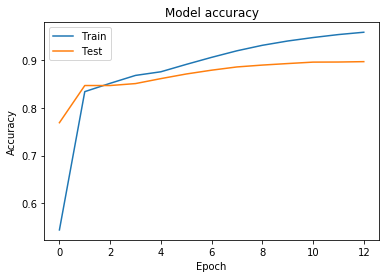

In [13]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(results.history['acc'])
plt.plot(results.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
#plt.savefig('C:\\Users\\DespoinaK\\Desktop\\acc.png')
plt.show()



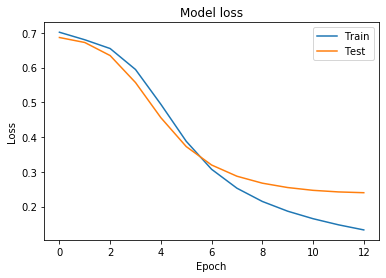

In [14]:
# Plot training & validation loss values
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
#plt.savefig('C:\\Users\\DespoinaK\\Desktop\\loss.png')
plt.show()


In [15]:
model.save('C:\\Users\\DespoinaK\\Desktop\\NN-Project\\my_model.h5') 
